In [1]:
# STEP 1: Unzip the uploaded file
!unzip -o archive.zip

# STEP 2: Check what file got extracted
import os
for f in os.listdir():
    if f.endswith('.csv'):
        print("Found CSV file:", f)


Archive:  archive.zip
  inflating: gld_price_data.csv      
Found CSV file: gld_price_data.csv


In [2]:
import pandas as pd
df = pd.read_csv("gld_price_data.csv")
df.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Data collection and processing

In [5]:
gold_data = pd.read_csv("gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
#last 5 rows of dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
#no of rows and columns
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
#checking missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [14]:
#statistical measures :
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
# correlation :
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

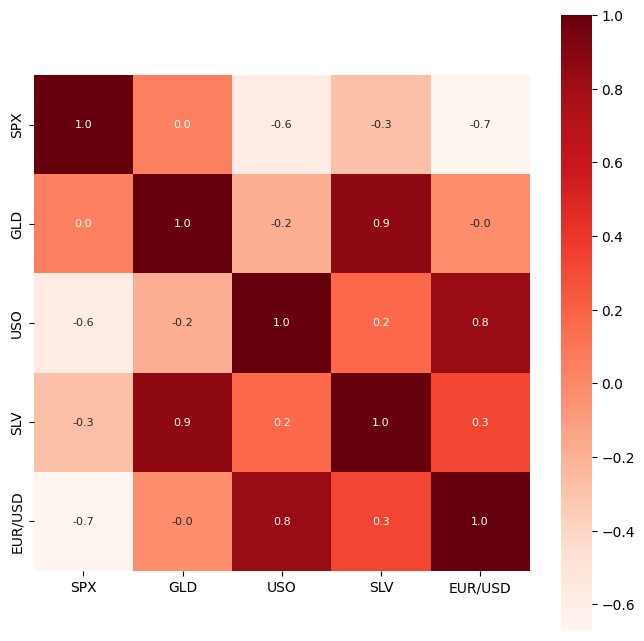

In [20]:
# constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [21]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-23-3791568905.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

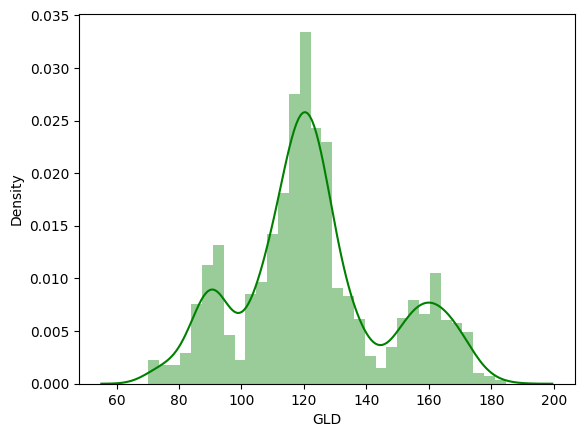

In [23]:
#checking the distribution of GLD price
sns.distplot(gold_data['GLD'], color='green')

In [24]:
# splitting the features and target
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [32]:
# Data Standardisation
scaler=StandardScaler()
standardized_data = scaler.fit_transform(x)
x=standardized_data
y=gold_data['GLD']

In [34]:
print(x)

[[-0.39914541  2.38880956 -0.6917197   1.42975293]
 [-0.39914541  2.38368652 -0.67691224  1.45103511]
 [-0.46760428  2.32938091 -0.69355301  1.45864621]
 ...
 [ 2.05926403 -0.89307824 -0.61274655 -0.69876145]
 [ 2.0728668  -0.89461519 -0.63813078 -0.68838269]
 [ 2.06448555 -0.89329341 -0.65305106 -0.77266741]]


In [27]:
# splitting training and testing data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [35]:
# model training :
regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
# prediction on test data :
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.70829986  82.02599978 116.12700037 127.57350035 120.61570115
 154.54049771 150.18609842 126.16660026 117.51959885 125.90940107
 116.55870105 172.02370099 141.53469867 167.58809857 114.86379968
 117.77760041 137.20500366 170.25880123 159.82610272 157.27159899
 155.1256992  125.18230023 176.4320997  157.54000308 125.09430049
  93.83589954  78.14150005 120.71100007 119.14469976 167.51070002
  88.05080057 125.29670033  91.19430098 117.72519985 121.23209921
 137.32200063 115.45140103 115.24910076 148.60940003 107.3569008
 104.07140236  87.27609805 126.55040055 118.11620001 154.48789884
 119.60359981 108.38030004 108.00549772  93.30710044 127.15959744
  74.79560079 113.73469956 121.38220023 111.19709888 118.94989892
 120.92599925 159.31430017 168.78950178 147.05359648  86.04749862
  94.71000016  86.84339904  90.51399996 118.98910056 126.47220038
 127.40300026 169.61629996 122.22489927 117.3060991   98.53330054
 168.67270203 143.07779926 131.95920233 121.10670243 120.73869971
 119.593200

In [43]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.988584516713317


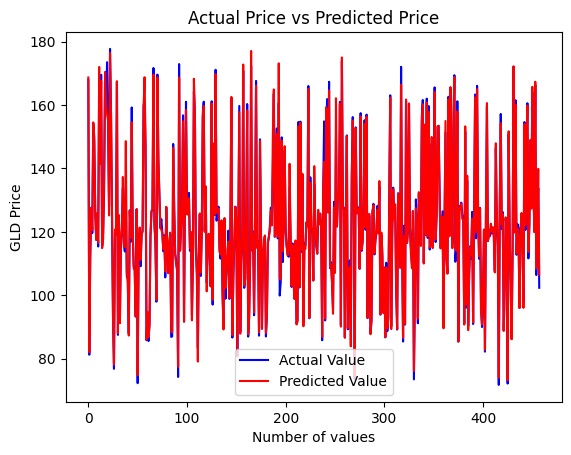

In [46]:
 # comparing actual and predicted values :
 y_test = list(y_test)
 plt.plot(y_test,color='blue',label='Actual Value')
 plt.plot(test_data_prediction,color='red',label='Predicted Value')
 plt.title('Actual Price vs Predicted Price')
 plt.xlabel('Number of values')
 plt.ylabel('GLD Price')
 plt.legend()
 plt.show()
